# Dependencies

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from time import strptime

# Load .csv file

In [ ]:
file = "monthly_data.csv"

# Read file with Pandas and understanding data

In [3]:
data = pd.read_csv(file)
data

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25
5,Chauncey Dach,Abbott Group,2016-03-21
6,Chauncey Dach,"Oga, Gottlieb and Cruickshank",2013-10-27
7,Rigoberto White,"Fahey, Wunsch and Bashirian",2016-05-14
8,Rigoberto White,Bosco-Ortiz,2014-07-14
9,Rigoberto White,Ondricka-Wolff,2015-10-14


In [4]:
data.shape

(1001, 3)

In [5]:
data.dtypes

Account manager    object
Client Name        object
Date of Contact    object
dtype: object

# Adding 'month', 'month_year' values extracted from 'Date of Contact column.

In [6]:
data['month'] = pd.DatetimeIndex(data['Date of Contact']).month_name().str.slice(stop=3)

# data['year'] = pd.DatetimeIndex(data['Date of Contact']).year

data['month_year'] = pd.to_datetime(data['Date of Contact']).dt.to_period('M')

data.head()

,Account manager,Client Name,Date of Contact,month,month_year
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,Oct,2015-10
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,Dec,2013-12
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,Dec,2013-12
3,Milan Crona,Armstrong Group,2013-11-02,Nov,2013-11
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,Dec,2013-12


# What is the number of unique client-specific contacts per month? 
# First, lets count the number of clients

In [45]:
unique_clients = data["Client Name"].nunique()
unique_clients

35

In [8]:
# Lets count the number of clients who were contacted, and sorted by aggregate months

unique_client_contacts = data.groupby('month')['Client Name'].nunique().sort_values(ascending=False).reset_index(name='Client Name')
unique_client_contacts

,month,Client Name
0,Oct,35
1,Jun,34
2,Sep,33
3,May,33
4,Aug,33
5,Dec,32
6,Feb,31
7,Nov,30
8,Jan,30
9,Mar,29


# Of the 35 clients, 100% were contacted in October. June was the next most popular month.

# Lets Illustrate the number of unique contacts by month

In [10]:
unique_contacts = data.groupby("month")['Client Name'].nunique().sort_values(ascending=False)
unique_contacts.head()

month
Oct    35
Jun    34
Sep    33
May    33
Aug    33
Name: Client Name, dtype: int64

Text(0, 0.5, 'Number of Client Contacts')

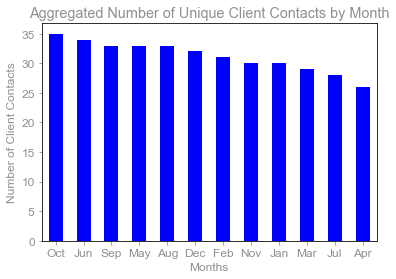

In [42]:
ax = unique_contacts.plot.bar(rot=0,color='b')
plt.title("Aggregated Number of Unique Client Contacts by Month")
plt.xlabel("Months")
plt.ylabel("Number of Client Contacts")

# Are 100% of clients contacted in October every year?

In [13]:
# Lets count whether clients were contacted at least once in each month, since October 2013.

unique_months = data.groupby('month_year')['Client Name'].nunique().sort_values(ascending=False).reset_index(name='Client Name')
unique_months

,month_year,Client Name
0,2013-10,31
1,2014-10,28
2,2015-10,28
3,2016-10,25
4,2014-09,23
5,2017-09,21
6,2014-06,19
7,2016-09,19
8,2015-09,18
9,2016-12,17


# No, not all clients are contacted each October, but October is the month every year when the highest percentage of clients are contacted.

# Lets Illustrate with a time series - number of unique contacts month by month totals

In [16]:
# Lets count the number of clients who were contacted each month, by year

unique_months2 = data.groupby('month_year')['Client Name'].nunique()
unique_months2

month_year
2013-10    31
2013-11    12
2013-12    15
2014-01     9
2014-02    11
2014-03    11
2014-04    11
2014-05    12
2014-06    19
2014-07    15
2014-08    17
2014-09    23
2014-10    28
2014-11    15
2014-12    15
2015-01    14
2015-02    15
2015-03    12
2015-04    12
2015-05    16
2015-06    14
2015-07    15
2015-08    15
2015-09    18
2015-10    28
2015-11    10
2015-12    14
2016-01    15
2016-02    14
2016-03    15
2016-04    11
2016-05    14
2016-06    15
2016-07    11
2016-08    14
2016-09    19
2016-10    25
2016-11    12
2016-12    17
2017-01    12
2017-02    13
2017-03    10
2017-04     9
2017-05    13
2017-06    13
2017-07    11
2017-08    13
2017-09    21
Freq: M, Name: Client Name, dtype: int64

Text(0, 0.5, 'Number of Client Contacts')

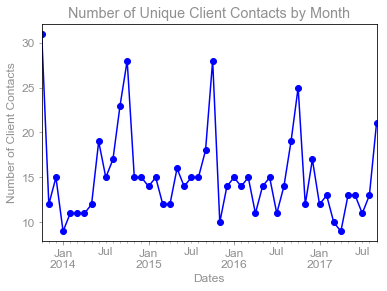

In [44]:
# Insert Bar Chart

fig = unique_months2.plot.line(rot=0,color='b', marker='o')
plt.title("Number of Unique Client Contacts by Month")
plt.xlabel("Dates")
plt.ylabel("Number of Client Contacts")

# The peaks in this graph are the October values. 
# Although every year October is the month when the greatest percentage of clients are contacted, there has there been a downward trend since October 2013. Leading up to October, there is ramp up of number of unique contacts coming out of summer, in the months of August and September.